In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [1]:
!pip3 install pandas
!pip3 install tensorflow
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 660.6 kB/s eta 0:00:18
   ---------------------------------------- 0.0/11.5 MB 660.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.5 MB 819.2 kB/s eta 0:00:14
    --------------------------------------- 0.3/11.5 MB 1.6 MB/s eta 0:00:08
    --------------------------------------- 0.3/11.5 MB 1.5 MB/s eta 0:00:08
    --------------------------------------- 0.3/11.5 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.6/11.5 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.6/11.5 MB 1.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/11.5 MB 2.0 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.5 MB 2.3 MB/s eta 0:00:05
   ---- ----------------------------------- 1.2/11.5 MB 2.5 MB/s eta 0:00:05

In [3]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding = 'latin',header=None)

df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# Understanding the csv file

- Our data consists of **1600000 rows × 6 columns** but there is no proper label.
- It is pretty much self explanatory that we have two values for sentiment that is **0** and **4**.
- **0** being the *negative* sentiment and **4** being the *positive* sentiment.
- Let's label our columns so that it is easier to understand. 

In [4]:
#Renaming the columns for understand the data better

df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']

df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Picking the right data 

- As we are doing the sentiment analysis on text we do not have the need to include the **date, query, user_id, id**.
- Our focus should be on the sentiment and text values.

In [5]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

df

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
df['sentiment'].value_counts()

sentiment
0    800000
4    800000
Name: count, dtype: int64

## Positive and negative sentiments

- So we have around 80,000 of positive and negative sentiment values each.
- For our better understanding lets label **0 as negative and 4 as positive**
- Visualizing the sentiment distributionusing bar graph

In [7]:
label_to_sentiment = {0:"Negative", 4:"Positive"}

def label_decoder(label):
    return label_to_sentiment[label]

df['sentiment'] = df['sentiment'].map(label_decoder)
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [8]:
df

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


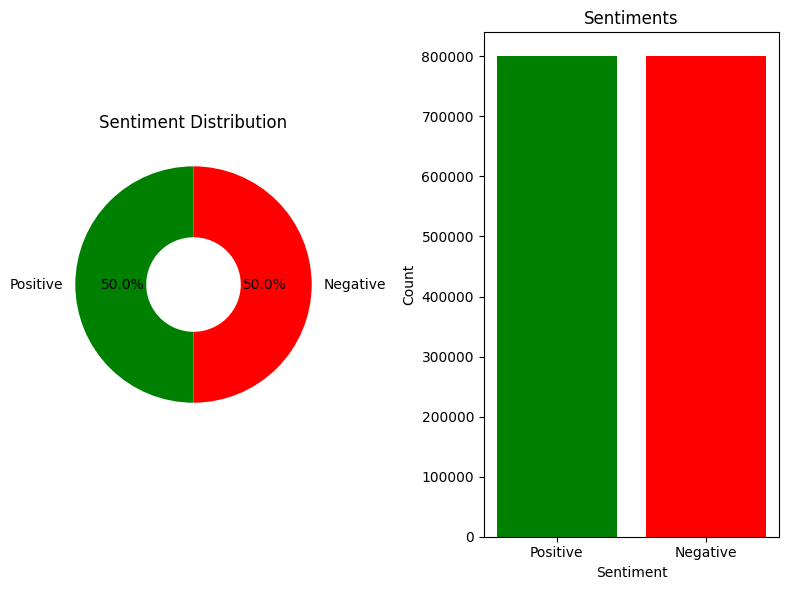

In [9]:
# Calculate user counts for positive and negative tweets
positive_tweets = df[df['sentiment'] == 'Positive'].shape[0]
negative_tweets = df[df['sentiment'] == 'Negative'].shape[0]
#sunplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

# Pie Chart for Sentiment Distribution
ax1.pie(
    [positive_tweets, negative_tweets],
    labels=['Positive', 'Negative'],
    autopct="%1.1f%%",
    startangle=90,
    colors=['green', 'red'],
    wedgeprops=dict(width=0.6)
)
ax1.set_title('Sentiment Distribution')

# Bar Chart for User Counts
ax2.bar(['Positive', 'Negative'], [positive_tweets, negative_tweets], color=['green', 'red'])
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Count')
ax2.set_title('Sentiments')

# Tight layout for better overall plot arrangement
plt.tight_layout()

# Display the combined plot
plt.show()

In [10]:
df.to_csv('sentiment_analysis_twitter.csv')

## Preprocessing the data
- To preprocess the data which will include Normalization, Stopword Removal, Stemming, Vectorization.



In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
import re

In [25]:
#nltk.download('punkt')
#nltk.download('stopwords')

## Normalization, Stopword Removal, Stemming

In [34]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_tweets(tweet):
    # Normalization: Lowercasing
    tweet = tweet.lower()
    
    # Remove URLs, handles, and special characters
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = re.sub(r"[^a-z\s]", '', tweet)
    
    # Tokenization
    tokens = word_tokenize(tweet)
    
    # Stopword Removal and Stemming
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    
    return " ".join(filtered_tokens)

# Apply the preprocessing function to a small sample for demonstration
sample_tweets = df['text'].head(10).apply(preprocess_tweets)

sample_tweets

0         that bummer shoulda got david carr third day
1    upset cant updat facebook text might cri resul...
2         dive mani time ball manag save rest go bound
3                      whole bodi feel itchi like fire
4                                behav im mad cant see
5                                           whole crew
6                                             need hug
7    hey long time see ye rain bit bit lol im fine ...
8                                           nope didnt
9                                            que muera
Name: text, dtype: object

In [35]:
tweets = df['text'].apply(preprocess_tweets)
tweets

0               that bummer shoulda got david carr third day
1          upset cant updat facebook text might cri resul...
2               dive mani time ball manag save rest go bound
3                            whole bodi feel itchi like fire
4                                      behav im mad cant see
                                 ...                        
1599995                           woke school best feel ever
1599996               thewdbcom cool hear old walt interview
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999                                 happi charitytuesday
Name: text, Length: 1600000, dtype: object

## Vectorization

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(tweets)

## Visualize the words by the positive and negative words using WordCloud

In [37]:
#!pip3 install WordCloud

In [39]:
!pip3 install wordcloud


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 991.0 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/301.4 kB 919.0 kB/s eta 0:00:01
   ----------------------------- ---------- 225.3/301.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.9 MB/s eta 0:00:00


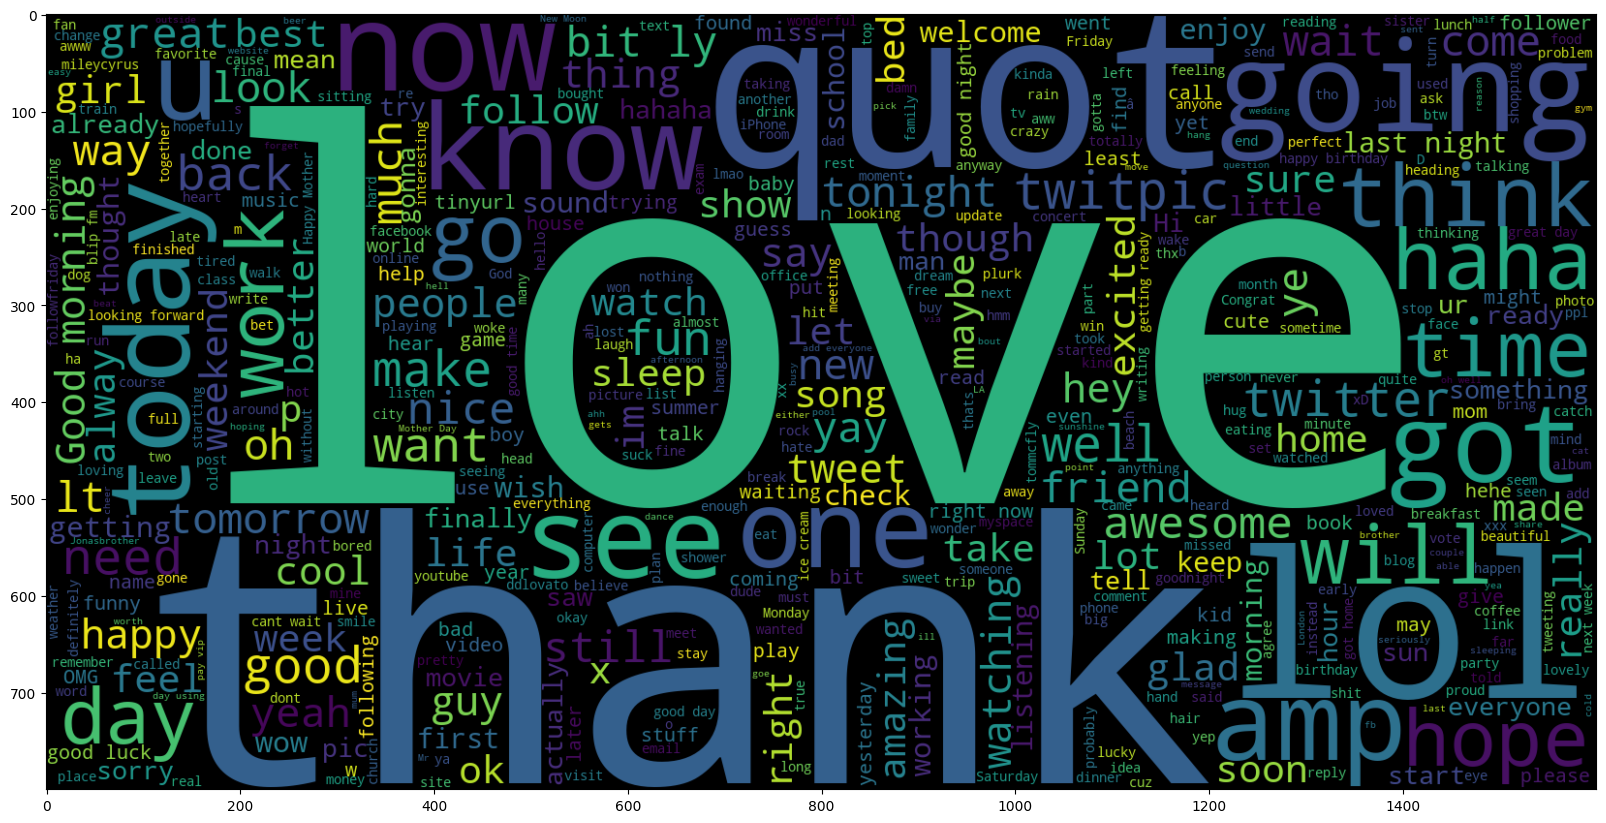

In [40]:
from wordcloud import WordCloud

# positive texts
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

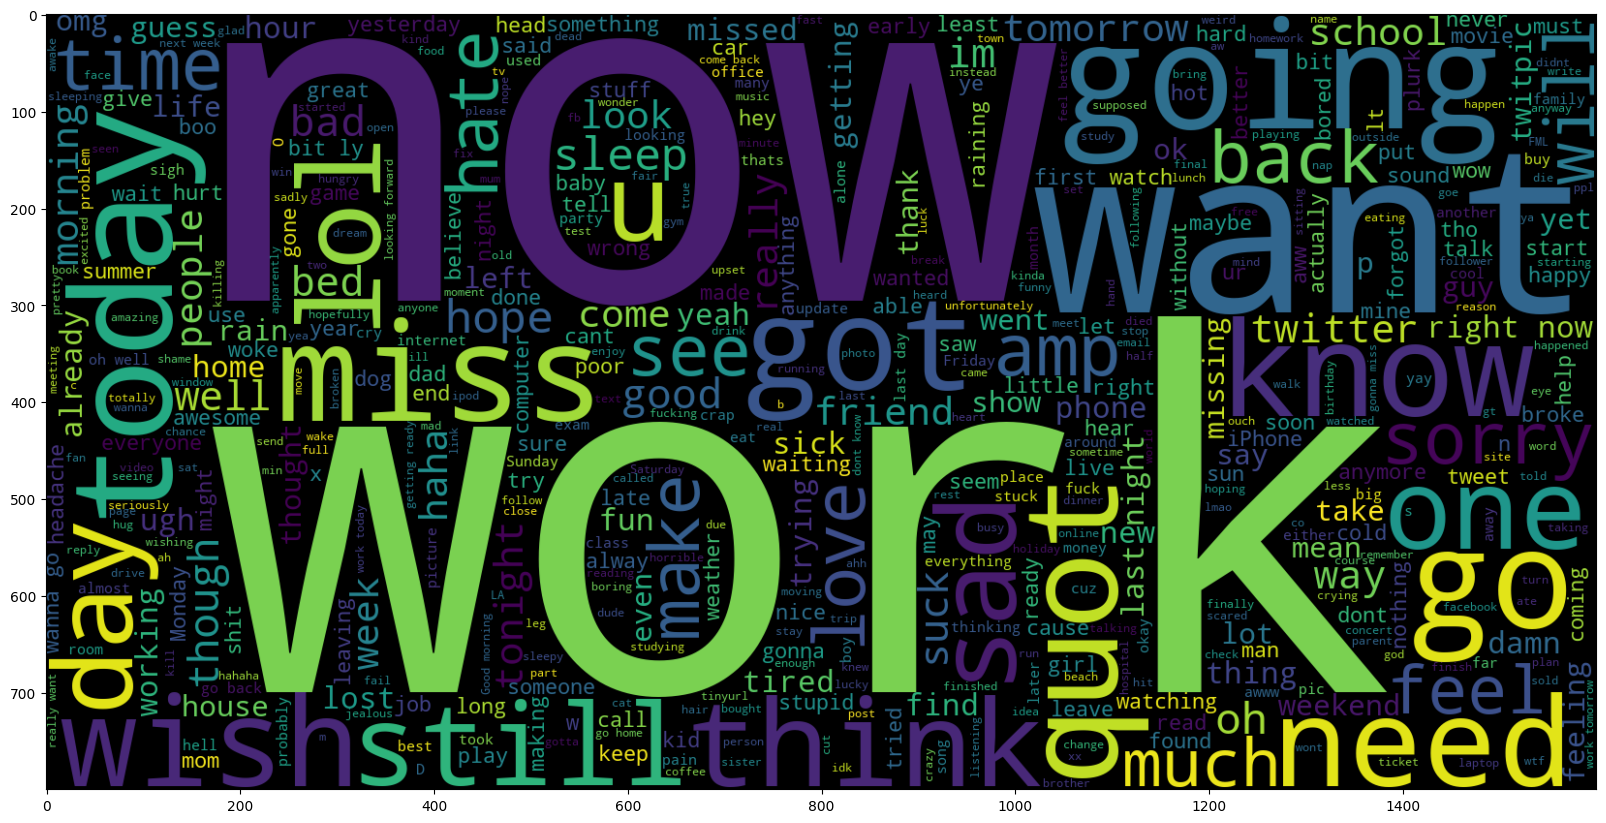

In [41]:
# negative texts
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

## Frequency of Words in Tweets
- Visualizing count vs words
- Let us figure the top 10 most common words and along with its least common words


C:\Users\mdjf7\AppData\Local\Temp\ipykernel_2036\1354277522.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


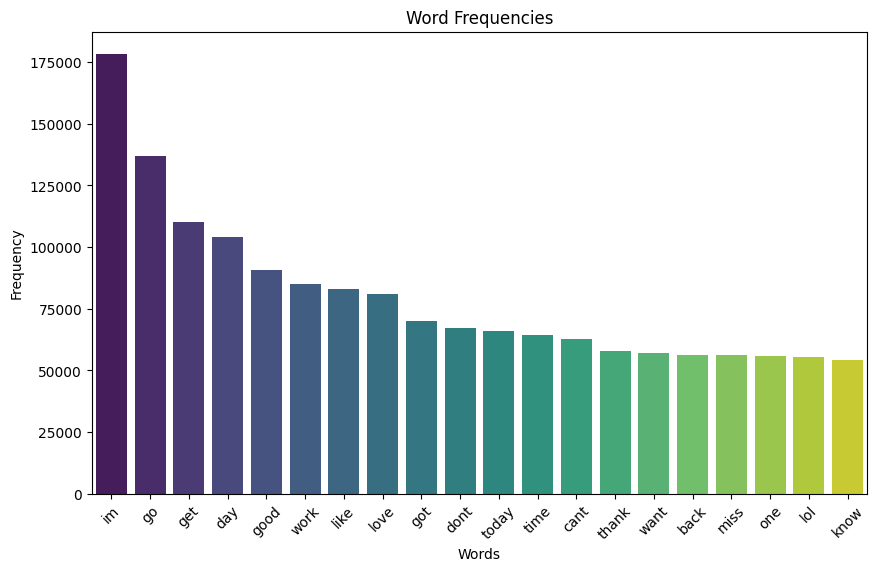

In [45]:
import seaborn as sns
# Function to plot bar plot of word frequencies
def plot_word_frequencies(text, title):
    word_freq = nltk.FreqDist(text.split())
    common_words = word_freq.most_common(20)
    words, freqs = zip(*common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(freqs), palette='viridis')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
# Step 3: Plot bar plots of word frequencies
plot_word_frequencies(' '.join(tweets), 'Word Frequencies')

In [46]:
# Combine all processed texts into one large string to find frequency
all_processed_text = " ".join(tweets)

# Tokenize the combined text
all_tokens = word_tokenize(all_processed_text)

# Calculate frequency distribution
freq_dist = nltk.FreqDist(all_tokens)

# Most common and least common words
most_common_words = freq_dist.most_common(10)  # Top 10
least_common_words = freq_dist.most_common()[-10:]  # Last 10

(most_common_words, least_common_words)

([('im', 178442),
  ('go', 137122),
  ('get', 110083),
  ('day', 104039),
  ('good', 90579),
  ('work', 85249),
  ('like', 82995),
  ('love', 81110),
  ('got', 70191),
  ('dont', 67316)],
 [('quotcuzzyquot', 1),
  ('icecreamcom', 1),
  ('justwaitin', 1),
  ('mysteriouslyi', 1),
  ('toadstool', 1),
  ('sunoudi', 1),
  ('nemuselo', 1),
  ('holc', 1),
  ('bigrun', 1),
  ('thewdbcom', 1)])

In [47]:
common_words = freq_dist.most_common()
common_words

[('im', 178442),
 ('go', 137122),
 ('get', 110083),
 ('day', 104039),
 ('good', 90579),
 ('work', 85249),
 ('like', 82995),
 ('love', 81110),
 ('got', 70191),
 ('dont', 67316),
 ('today', 66131),
 ('time', 64380),
 ('cant', 62901),
 ('thank', 57954),
 ('want', 57059),
 ('back', 56414),
 ('miss', 56310),
 ('one', 55922),
 ('lol', 55415),
 ('know', 54060),
 ('u', 53086),
 ('see', 50797),
 ('feel', 50660),
 ('think', 50636),
 ('realli', 49603),
 ('well', 44614),
 ('hope', 43759),
 ('night', 43559),
 ('watch', 43131),
 ('need', 42915),
 ('still', 42858),
 ('make', 42562),
 ('new', 42007),
 ('na', 41714),
 ('amp', 40799),
 ('home', 39509),
 ('look', 39101),
 ('come', 38631),
 ('oh', 38145),
 ('much', 36554),
 ('last', 35763),
 ('twitter', 34434),
 ('morn', 34276),
 ('tomorrow', 33354),
 ('wish', 33245),
 ('great', 32988),
 ('wait', 32004),
 ('ill', 31991),
 ('sleep', 31236),
 ('that', 30624),
 ('haha', 30363),
 ('sad', 29158),
 ('fun', 27958),
 ('tri', 27864),
 ('week', 27569),
 ('right', 2

In [48]:
tweets

0               that bummer shoulda got david carr third day
1          upset cant updat facebook text might cri resul...
2               dive mani time ball manag save rest go bound
3                            whole bodi feel itchi like fire
4                                      behav im mad cant see
                                 ...                        
1599995                           woke school best feel ever
1599996               thewdbcom cool hear old walt interview
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999                                 happi charitytuesday
Name: text, Length: 1600000, dtype: object

## Using Logisitc regression

In [49]:
df = pd.read_csv('sentiment_analysis_twitter.csv')
df

,Unnamed: 0,sentiment,text
0,0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,Negative,is upset that he can't update his Facebook by ...
2,2,Negative,@Kenichan I dived many times for the ball. Man...
3,3,Negative,my whole body feels itchy and like its on fire
4,4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,1599995,Positive,Just woke up. Having no school is the best fee...
1599996,1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


In [50]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


In [51]:
label_to_sentiment = {"Negative":0, "Positive":1}

df['sentiment'] = df['sentiment'].map(label_decoder)
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [52]:
df

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


In [53]:
df.to_csv('cleaned_sentiment_analysis_twitter.csv')

In [54]:
df['text'] = df['text'].apply(preprocess_tweets)

In [55]:
df

,sentiment,text
0,0,that bummer shoulda got david carr third day
1,0,upset cant updat facebook text might cri resul...
2,0,dive mani time ball manag save rest go bound
3,0,whole bodi feel itchi like fire
4,0,behav im mad cant see
...,...,...
1599995,1,woke school best feel ever
1599996,1,thewdbcom cool hear old walt interview
1599997,1,readi mojo makeov ask detail
1599998,1,happi th birthday boo alll time tupac amaru sh...


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



# Convert tokenized text to BoW features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

# Assuming df is your DataFrame with the target column modified
y = df['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increase from the default value
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)


report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           1       0.77      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Logistic Regression Accuracy: 0.776565625


## Naive Bayes
- We will go through different Navies Bayes Model: ComplementNB, MultinatinominalNB, BernoulliNB

In [58]:
X = vectorizer.fit_transform(df['text'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 76.58%
------------------------------------------------
Confusion Matrix:
        0       1
0  124758   34736
1   40211  120295
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77    159494
           1       0.78      0.75      0.76    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [60]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 76.58%
------------------------------------------------
Confusion Matrix:
        0       1
0  124807   34687
1   40252  120254
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77    159494
           1       0.78      0.75      0.76    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [61]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 76.77%
------------------------------------------------
Confusion Matrix:
        0       1
0  121672   37822
1   36520  123986
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77    159494
           1       0.77      0.77      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



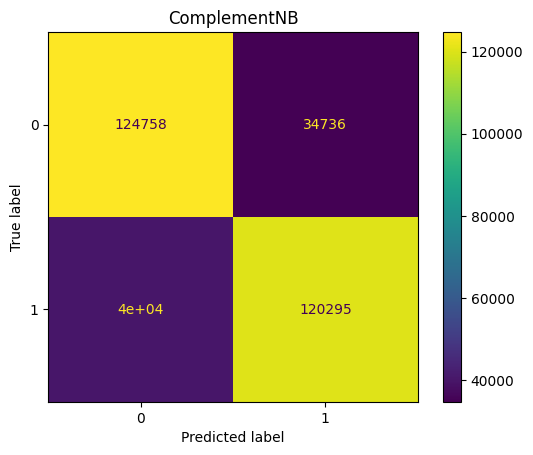

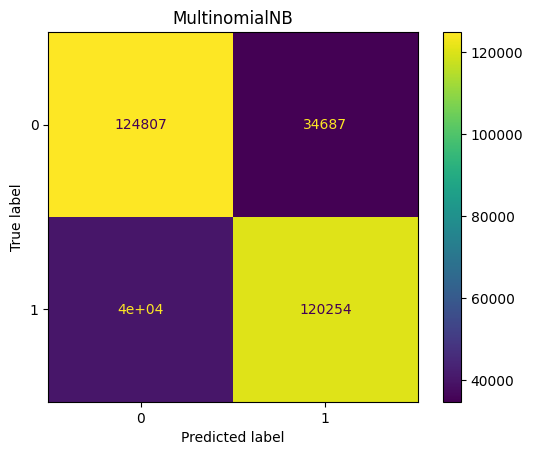

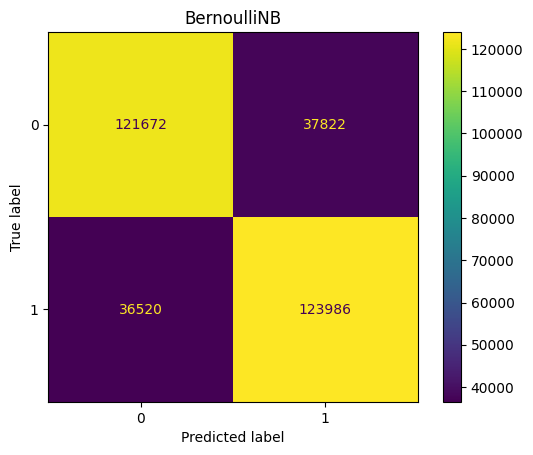

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
k = [CNB, MNB, BNB]

for i in k:
    disp = ConfusionMatrixDisplay.from_estimator(i, X_test, y_test)
    plt.title(type(i).__name__)  # Shows the class name of the classifier
    plt.show()


0.8407133111864588 0.8407132644867729 0.8426285996389116


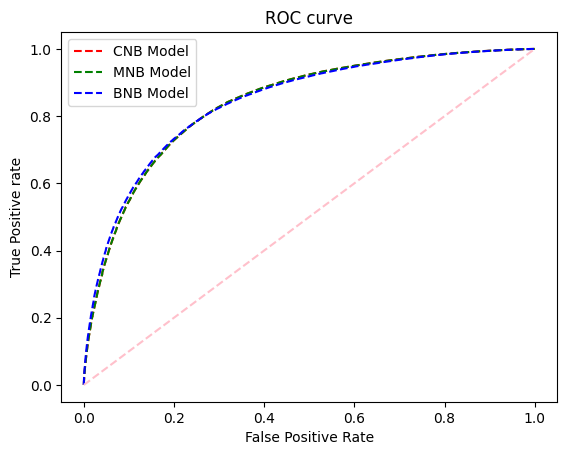

In [63]:
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models: 
CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Decision Tree

- **While running the deision tree models it took us nearly 2 hours for the code to run.**
- **We got around 72% accuracy for all the  three models** 


In [ ]:
# Import necessary libraries
#from sklearnex import patch_sklearn
#patch_sklearn()

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaned_sentiment_analysis_twitter.csv')  # Replace with your dataset file

# Prepare Text Data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])  # Assuming 'text' is the column containing the text data
y = df['sentiment']  # Assuming 'sentiment' is the column containing the sentiment labels

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate Model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Evaluation Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Optimized Decision tree

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearnex import patch_sklearn
#patch_sklearn()  # Patch scikit-learn to use Intel(R) Extension for Scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaned_sentiment_analysis_twitter.csv')  # Replace with your dataset file

# Prepare Text Data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])  # Assuming 'text' is the column containing the text data
y = df['sentiment']  # Assuming 'sentiment' is the column containing the sentiment labels

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and best parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Evaluation Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Ensemble Models

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearnex import patch_sklearn
#patch_sklearn()  # Patch scikit-learn to use Intel(R) Extension for Scikit-learn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('cleaned_sentiment_analysis_twitter.csv') # Replace with your dataset file

# Prepare Text Data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])  # Assuming 'text' is the column containing the text data
y = df['sentiment']  # Assuming 'sentiment' is the column containing the sentiment labels

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_
rf_best_params = rf_grid_search.best_params_

print("Random Forest - Best Parameters:", rf_best_params)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
gb_best_model = gb_grid_search.best_estimator_
gb_best_params = gb_grid_search.best_params_

print("Gradient Boosting - Best Parameters:", gb_best_params)

# Evaluate the models
models = [
    ('Random Forest', rf_best_model),
    ('Gradient Boosting', gb_best_model)
]

for name, model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{name} - Accuracy: {accuracy}")
    print(f"{name} - Precision: {precision}")
    print(f"{name} - Recall: {recall}")
    print(f"{name} - F1-score: {f1}")
    print()

### Simple decision tree using bag of words

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaned_sentiment_analysis_twitter.csv')  # Replace with your dataset file

# Prepare Text Data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])  # Assuming 'text' is the column containing the text data
y = df['sentiment']  # Assuming 'sentiment' is the column containing the sentiment labels

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate Model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Evaluation Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.73429375
Precision: 0.7343044139607309
Recall: 0.73429375
F1-score: 0.7342941419687413


### Simple MLP using bag of words

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
df = pd.read_csv('cleaned_sentiment_analysis_twitter.csv')  # Replace with your dataset file
texts = df['text'].values
labels = df['sentiment'].values

# Preprocess the text data
vectorizer = CountVectorizer(max_features=5000)  # Reduce the number of features
X = vectorizer.fit_transform(texts)  # Keep the sparse matrix representation

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Build the MLP model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

C:\Users\mdjf7\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - accuracy: 0.7846 - loss: 0.4581 - val_accuracy: 0.8080 - val_loss: 0.4198
Epoch 2/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - accuracy: 0.8214 - loss: 0.3981 - val_accuracy: 0.8095 - val_loss: 0.4188
Epoch 3/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 87s 2ms/step - accuracy: 0.8368 - loss: 0.3728 - val_accuracy: 0.8080 - val_loss: 0.4240
Epoch 4/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.8478 - loss: 0.3528 - val_accuracy: 0.8049 - val_loss: 0.4307
Epoch 5/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - accuracy: 0.8567 - loss: 0.3360 - val_accuracy: 0.8031 - val_loss: 0.4406
Epoch 6/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - accuracy: 0.8652 - loss: 0.3199 - val_accuracy: 0.7994 - val_loss: 0.4524
Epoch 7/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - accuracy: 0.8714 - loss: 0.3070 - val_accuracy: 0.7984 - val_loss: 0.4654
Epoch 8/10
36000/36000 ━━━━━━━━━━━━━━━━━━━━ 89s 2ms/step - accuracy: 

### Deep MLP using bag of words

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('cleaned_sentiment_analysis_twitter.csv')  # Replace with your dataset file
texts = df['text'].values
labels = df['sentiment'].values

# Preprocess the text data
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Build the Deep MLP model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

C:\Users\mdjf7\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 0.7689 - loss: 0.4856 - val_accuracy: 0.8044 - val_loss: 0.4265
Epoch 2/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.8062 - loss: 0.4265 - val_accuracy: 0.8087 - val_loss: 0.4177
Epoch 3/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8166 - loss: 0.4092 - val_accuracy: 0.8108 - val_loss: 0.4161
Epoch 4/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.8251 - loss: 0.3953 - val_accuracy: 0.8111 - val_loss: 0.4162
Epoch 5/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.8313 - loss: 0.3845 - val_accuracy: 0.8112 - val_loss: 0.4160
Epoch 6/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.8363 - loss: 0.3761 - val_accuracy: 0.8104 - val_loss: 0.4176
Epoch 7/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8394 - loss: 0.3701 - val_accuracy: 0.8106 - val_loss: 0.4198
Epoch 8/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.8437 - loss: 0

### MLP with Dropout Regularization using bag of words

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('cleaned_sentiment_analysis_twitter.csv')  # Replace with your dataset file
texts = df['text'].values
labels = df['sentiment'].values

# Preprocess the text data
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Build the MLP model with Dropout Regularization
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

C:\Users\mdjf7\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7701 - loss: 0.4831 - val_accuracy: 0.8025 - val_loss: 0.4283
Epoch 2/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8032 - loss: 0.4311 - val_accuracy: 0.8068 - val_loss: 0.4210
Epoch 3/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8120 - loss: 0.4164 - val_accuracy: 0.8086 - val_loss: 0.4195
Epoch 4/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.8180 - loss: 0.4071 - val_accuracy: 0.8092 - val_loss: 0.4180
Epoch 5/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8219 - loss: 0.4003 - val_accuracy: 0.8102 - val_loss: 0.4177
Epoch 6/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.8250 - loss: 0.3948 - val_accuracy: 0.8101 - val_loss: 0.4191
Epoch 7/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8279 - loss: 0.3901 - val_accuracy: 0.8101 - val_loss: 0.4197
Epoch 8/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8302 - loss: 0

### MLP with Batch Normalization using bag of words

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('cleaned_sentiment_analysis_twitter.csv')  # Replace with your dataset file
texts = df['text'].values
labels = df['sentiment'].values

# Preprocess the text data
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Build the MLP model with Batch Normalization
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

C:\Users\mdjf7\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.7764 - loss: 0.4689 - val_accuracy: 0.8052 - val_loss: 0.4218
Epoch 2/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.8145 - loss: 0.4035 - val_accuracy: 0.8090 - val_loss: 0.4157
Epoch 3/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.8338 - loss: 0.3695 - val_accuracy: 0.8067 - val_loss: 0.4203
Epoch 4/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.8494 - loss: 0.3401 - val_accuracy: 0.8039 - val_loss: 0.4334
Epoch 5/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8637 - loss: 0.3138 - val_accuracy: 0.8006 - val_loss: 0.4491
Epoch 6/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.8737 - loss: 0.2933 - val_accuracy: 0.7954 - val_loss: 0.4651
Epoch 7/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.8823 - loss: 0.2759 - val_accuracy: 0.7920 - val_loss: 0.4854
Epoch 8/10
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.8896 - loss: 0

### Linear SVM with TF-IDF

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have preprocessed the dataset and stored the tweets in a list called 'tweets'
# and the corresponding sentiment labels in a list called 'labels'
df = pd.read_csv('cleaned_sentiment_analysis_twitter.csv')  # Replace with your dataset file
texts = df['text'].values
labels = df['sentiment'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer to convert tweets into numerical feature vectors
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Create a Linear SVM classifier
svm_classifier = LinearSVC(C=1.0, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train_vectors, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test_vectors)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

C:\Users\mdjf7\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.7963
Precision: 0.7963164741570952
Recall: 0.7962862217944955
F1 Score: 0.7962903715370921


### Linear SVM using bag of words

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have preprocessed the dataset and stored the tweets in a list called 'tweets'
# and the corresponding sentiment labels in a list called 'labels'
df = pd.read_csv('cleaned_sentiment_analysis_twitter.csv')  # Replace with your dataset file
texts = df['text'].values
labels = df['sentiment'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create a Bag of Words vectorizer to convert tweets into numerical feature vectors
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Create a Linear SVM classifier
svm_classifier = LinearSVC(C=1.0, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train_vectors, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test_vectors)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

C:\Users\mdjf7\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mdjf7\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.787971875
Precision: 0.7879699497858448
Recall: 0.7879689538835577
F1 Score: 0.7879694013462631
